In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import os
import sys

In [157]:
# Dynamic Import of Merged Data from EDA
def dynamic_import():
    notebook_path = os.path.join(os.getcwd(), 'Siddharth_Sanghavi_EDA.ipynb')
    sys.path.insert(0, os.path.dirname(notebook_path))
    
    try:
        from Siddharth_Sanghavi_EDA import merged_data
        print("Successfully imported merged_data.")
        return merged_data
    except Exception as e:
        print(f"Error during import: {e}")
        return None

customer_features = dynamic_import()

Successfully imported merged_data.


In [158]:
if customer_features is None:
    print("Error: customer_features is None!")
else:
    print("Data types in customer_features:\n", customer_features.dtypes)
    customer_features_numeric = customer_features.select_dtypes(include=[float, int])
    clustering_data = customer_features_numeric.iloc[:, 1:]

Data types in customer_features:
 TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductName                object
Category                   object
ProductPrice              float64
Year                        int32
Month                      object
DayOfWeek                  object
dtype: object


In [159]:
# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4, linkage='complete')
clusters = agg_clust.fit_predict(clustering_data)

In [160]:
# DB Index Evaluation
db_index_agg = davies_bouldin_score(clustering_data, clusters)
print(f"DB Index for Agglomerative Clustering (complete linkage): {db_index_agg}")

DB Index for Agglomerative Clustering (complete linkage): 0.6265738110837323


In [161]:
# Silhouette Score Evaluation
silhouette = silhouette_score(clustering_data, clusters)
print(f"Silhouette Score for Agglomerative Clustering (complete linkage): {silhouette}")

Silhouette Score for Agglomerative Clustering (complete linkage): 0.4686875333184936


In [162]:
# Apply PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)

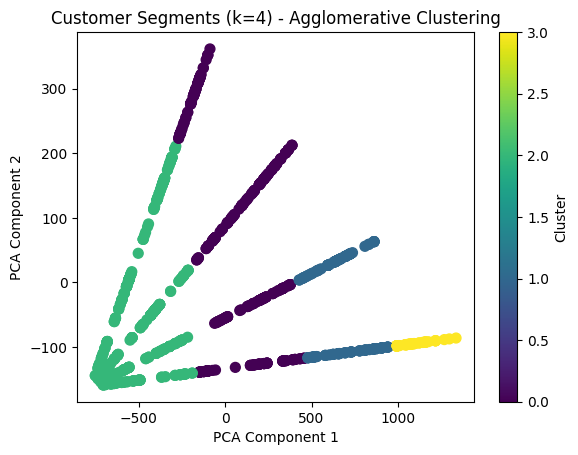

In [163]:
# Plot the customer segments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f"Customer Segments (k={4}) - Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()